In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
train_identity = pd.read_csv(f'/kaggle/input/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv(f'/kaggle/input/ieee-fraud-detection/train_transaction.csv')
test_identity = pd.read_csv(f'/kaggle/input/ieee-fraud-detection/test_identity.csv')
test_transaction = pd.read_csv(f'/kaggle/input/ieee-fraud-detection/test_transaction.csv')
sub = pd.read_csv(f'/kaggle/input/ieee-fraud-detection/sample_submission.csv')
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [3]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
full_train_df = pd.merge(train_identity,train_transaction, on='TransactionID', how='left')

In [6]:
full_train_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


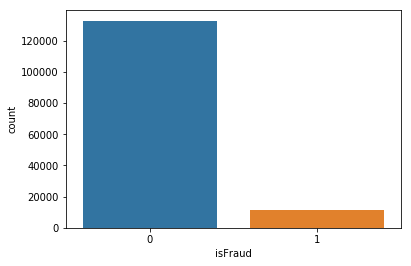

In [7]:
#corr=full_train_df.corrwith(full_train_df.isFraud).plot.bar( figsize = (20, 10), title = "Correlation with Class", fontsize = 15, rot = 45, grid = False)
import seaborn as sns
sns.countplot(x='isFraud', data=full_train_df)

In [8]:
full_train_df.fillna(value=full_train_df.median(), inplace=True)


/opt/conda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
from sklearn  import preprocessing
for col in full_train_df.columns:
    if full_train_df[col].dtype=='object' :
        print("label encoding",col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(full_train_df[col].values))
        full_train_df[col] =lbl.transform(list(full_train_df[col].values))

label encoding id_12
label encoding id_15
label encoding id_16
label encoding id_23
label encoding id_27
label encoding id_28
label encoding id_29
label encoding id_30
label encoding id_31
label encoding id_33
label encoding id_34
label encoding id_35
label encoding id_36
label encoding id_37
label encoding id_38
label encoding DeviceType
label encoding DeviceInfo
label encoding ProductCD
label encoding card4
label encoding card6
label encoding P_emaildomain
label encoding R_emaildomain
label encoding M4


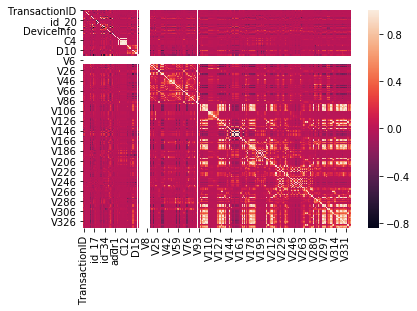

In [10]:
# Correlation matrix
corrmat = full_train_df.corr()
sns.heatmap(corrmat, square = False)


In [11]:
df_clean = full_train_df.loc[:, full_train_df.isnull().median() <= .4]

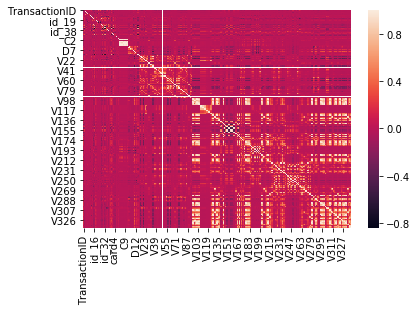

In [12]:
# Another correlation matrix
corrmat = df_clean.corr()
sns.heatmap(corrmat, square = False)


In [13]:
df_clean = full_train_df.loc[:, full_train_df.isnull().median() <= .8]

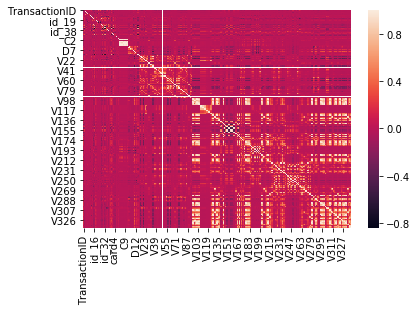

In [14]:
# Another correlation matrix
corrmat = df_clean.corr()
sns.heatmap(corrmat, square = False)


In [15]:
x_clean_df = df_clean.drop(["isFraud"], axis=1)
y_clean_df = df_clean["isFraud"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_clean_df, y_clean_df, test_size=0.50)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [17]:
logReg = LogisticRegression(solver="lbfgs", max_iter=1000)


logReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
logReg.score(X_test, y_test)

0.9234854472593147

In [19]:
y_pred=logReg.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66492
           1       0.66      0.04      0.08      5625

    accuracy                           0.92     72117
   macro avg       0.79      0.52      0.52     72117
weighted avg       0.90      0.92      0.89     72117



In [21]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,66374,118,66492
1,5400,225,5625
All,71774,343,72117
